In [1162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [1163]:
df = pd.read_csv("../../Data/03.통합.csv")
df.head()

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7


In [1164]:
df_s = df[["년도", "시도", "전출인구",	"산부인과의원수",	"초등학생인원수",	"도매 및 소매업 신생"]]
df_s.set_index('년도', inplace=True)
df_s.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 2013 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   시도           136 non-null    object
 1   전출인구         136 non-null    int64 
 2   산부인과의원수      136 non-null    int64 
 3   초등학생인원수      136 non-null    int64 
 4   도매 및 소매업 신생  136 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.4+ KB


In [1165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   년도           136 non-null    int64  
 1   시도           136 non-null    object 
 2   총인구          136 non-null    int64  
 3   전출인구         136 non-null    int64  
 4   출생아수         136 non-null    int64  
 5   산부인과의원수      136 non-null    int64  
 6   초등학생인원수      136 non-null    int64  
 7   도매 및 소매업 신생  136 non-null    int64  
 8   예금은행대출금액     136 non-null    float64
 9   예금액          136 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 10.8+ KB


In [1166]:
from sklearn.cluster import KMeans

df_temp = df.copy()
df_temp.set_index('시도', inplace=True)
df_km = df_temp

data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df_km['cluster_id'] = km.labels_

# Feature, Target
data = df_km[['전출인구', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

# Feature, Target
data = df_km[['전출인구', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']].to_numpy()
target = df_km['cluster_id'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
    
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(train_input, train_target)

print("Train score :", rf.score(test_input, test_target))

Train score : 0.9976580911635526


In [1167]:
df_km

,년도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,,,
경기도,2013,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
서울특별시,2013,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
경상남도,2013,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
부산광역시,2013,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
대구광역시,2013,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
...,...,...,...,...,...,...,...,...,...,...
충청북도,2020,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00
대전광역시,2020,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00
강원도,2020,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00


#### 예측값 데이터프레임에 컬럼 추가

In [1168]:
pred_cluster = []

for i in range(len(df_km)):
    pred_cluster.append(rf.predict([[df.iloc[i,3], df.iloc[i,4],df.iloc[i,6], df.iloc[i,7]]]))

df_km['pred_cluster'] = pred_cluster
df_km.reset_index(inplace=True)
df_km

,시도,년도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id,pred_cluster
0,경기도,2013,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00,[0.1254]
1,서울특별시,2013,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33,[0.3233999999999992]
2,경상남도,2013,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67,[0.5680000000000005]
3,부산광역시,2013,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67,[0.5680000000000005]
4,대구광역시,2013,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67,[0.5680000000000005]
...,...,...,...,...,...,...,...,...,...,...,...,...
131,충청북도,2020,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00,[0.8498]
132,대전광역시,2020,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00,[0.8498]
133,강원도,2020,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00,[0.8498]
134,제주특별자치도,2020,674635,94736,3989,23,40575,2856,20182.3,14025.4,1.00,[0.8498]


## RandomForestRegressor

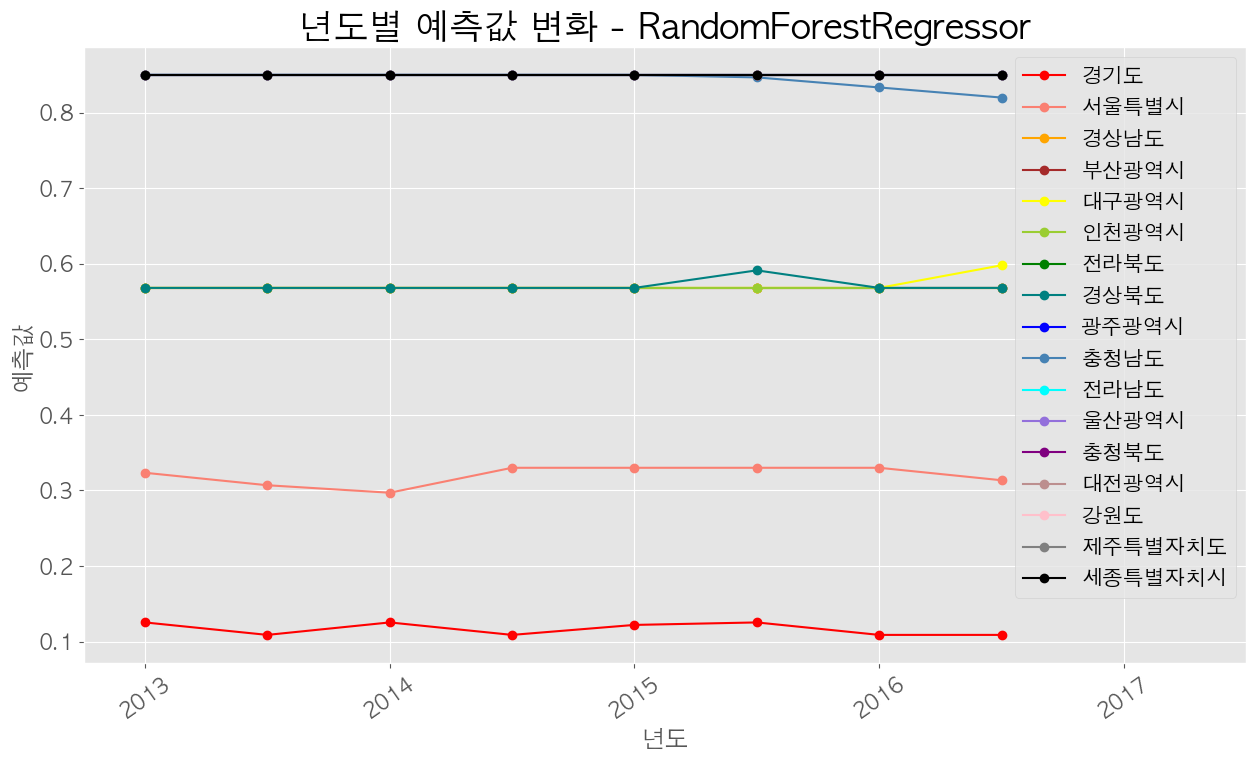

In [1169]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

sido = pd.unique(df_km.시도)
years = list(range(8))
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']

for i in range(len(sido)):
    
    ax.plot(
        years,
        df_km[df_km['시도'] == sido[i]]['pred_cluster'],
        marker='o',
        label=sido[i],
        color=colors[i]
    )

ax.legend(loc='best', fontsize=15)
ax.set_xlim(-0.5, 9)
# ax.set_ylim(0.75, 1.05)
ax.set_title('년도별 예측값 변화 - RandomForestRegressor', size=25)
ax.set_ylabel('예측값', fontsize=17)
plt.yticks(fontsize=15)
ax.set_xlabel('년도', fontsize=17)
ax.set_xticklabels([0, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], rotation=35, fontsize=15)

plt.show()

## 다중 회귀

In [1170]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.8667661067673144


In [1171]:
df

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4


In [1172]:
pred_cluster = []

for i in range(len(df_km)):
    pred_cluster.append(lr.predict([[df.iloc[i,3], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7]]]))

df_km['pred_cluster'] = pred_cluster
df_km.reset_index(inplace=True)
df_km

,index,시도,년도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id,pred_cluster
0,0,경기도,2013,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00,[-0.004074525700594744]
1,1,서울특별시,2013,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33,[0.24132938364382206]
2,2,경상남도,2013,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67,[0.7777696585187236]
3,3,부산광역시,2013,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67,[0.7914589058476316]
4,4,대구광역시,2013,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67,[0.8438289033886727]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,충청북도,2020,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00,[0.9209852655431024]
132,132,대전광역시,2020,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00,[0.9228458395030946]
133,133,강원도,2020,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00,[0.9354228685533605]
134,134,제주특별자치도,2020,674635,94736,3989,23,40575,2856,20182.3,14025.4,1.00,[0.9869251062342436]


In [1173]:
sido = pd.unique(df_km.시도)
sido

array(['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '전라북도', '경상북도',
       '광주광역시', '충청남도', '전라남도', '울산광역시', '충청북도', '대전광역시', '강원도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

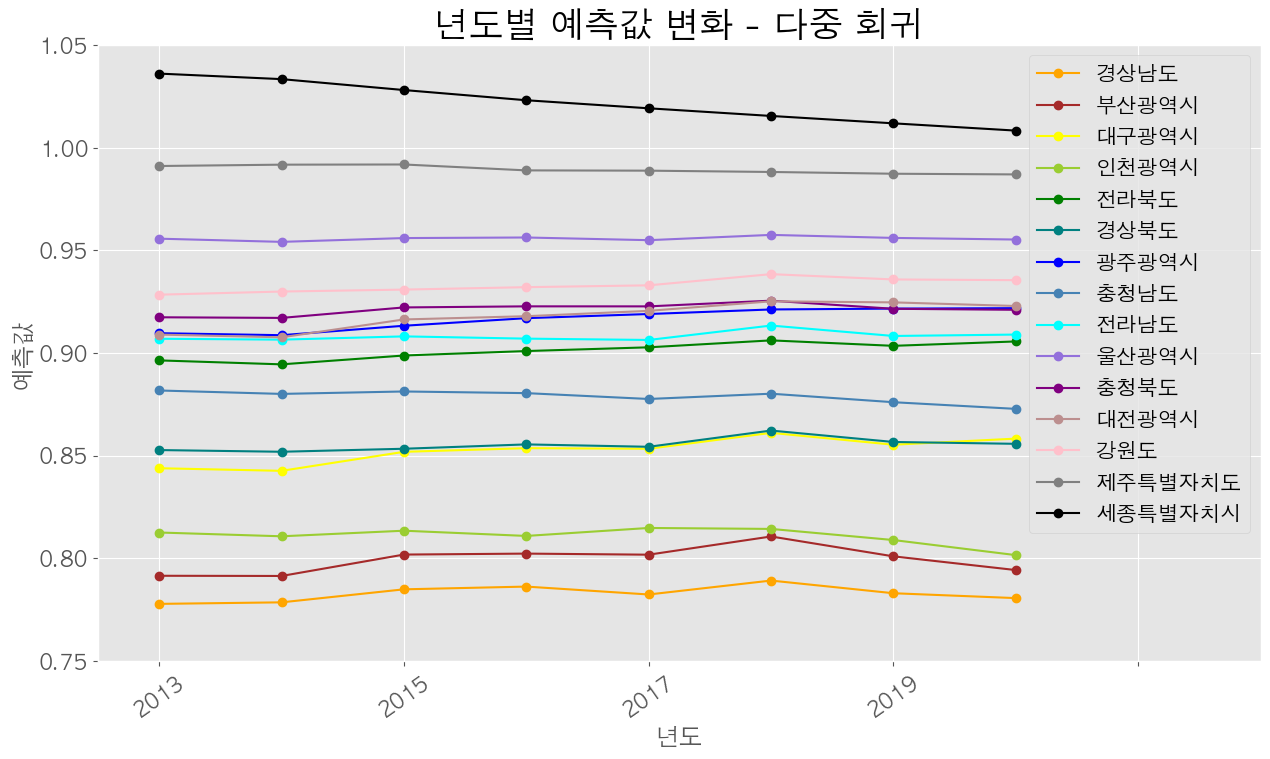

In [1174]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

sido = pd.unique(df_km.시도)
years = list(range(8))
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']

for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    
    ax.plot(
        years,
        df_km[df_km['시도'] == sido[i]]['pred_cluster'],
        marker='o',
        label=sido[i],
        color=colors[i]
    )

ax.legend(loc='best', fontsize=15)
ax.set_xlim(-0.5, 9)
ax.set_ylim(0.75, 1.05)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - 다중 회귀', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)
ax.set_xticklabels([0, 2013, 2015, 2017, 2019], rotation=35, fontsize=15)
# ax.set_yticklabels([0.75, 0.80, 0.85, 0.9, 0.95, 1.00, 1.05], fontsize=15)

plt.show()

In [1175]:
rf.feature_importances_

array([0.26861847, 0.20554963, 0.27798646, 0.24784544])